Precomputing frames...
Creating animation...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

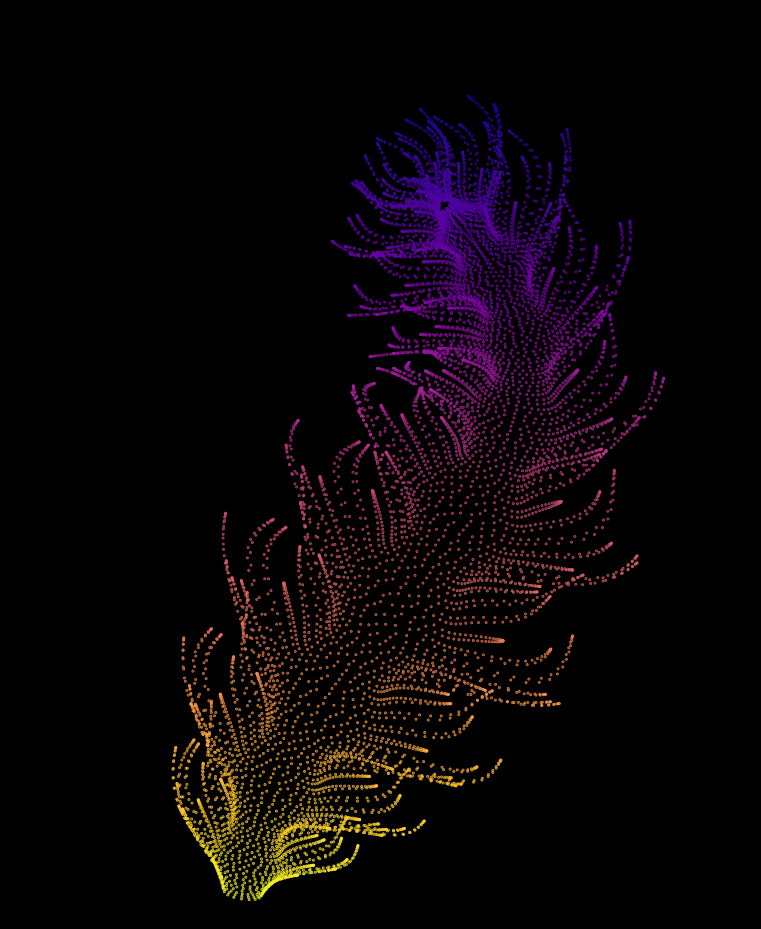

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import to_rgb
from matplotlib import cm
from IPython.display import HTML
from matplotlib.animation import PillowWriter

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.set_xlim(70, 330)
ax.set_ylim(350, 30)  # Inverted y-axis
ax.set_aspect('equal')
ax.axis('off')

# Dark background
bg_color = to_rgb('#000000')
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Animation parameters
num_frames = 150
num_points = 10000
t_values = np.linspace(0, 2*np.pi, num_frames)

# Base values
i_vals = np.arange(num_points)
x = i_vals
y = i_vals / 235.0

# Allocate arrays
xp_all = np.zeros((num_frames, num_points))
yp_all = np.zeros((num_frames, num_points))

# Compute all frames
print("Precomputing frames...")
for frame_idx, t in enumerate(t_values):
    k = (4 + np.sin(x / 11 + 8 * t)) * np.cos(x / 14)
    e = y / 8 - 19
    d = np.sqrt(k**2 + e**2) + np.sin(y / 9 + 2 * t)
    q = 2 * np.sin(2 * k) + np.sin(y / 17) * k * (9 + 2 * np.sin(y - 3 * d))
    c = d**2 / 49 - t

    xp = q + 50 * np.cos(c) + 200
    yp = q * np.sin(c) + 39 * d - 440

    xp_all[frame_idx] = xp
    yp_all[frame_idx] = 400 - yp  # Invert y

# Initial scatter with colors
norm = plt.Normalize(yp_all[0].min(), yp_all[0].max())
colors = cm.plasma(norm(yp_all[0]))

scatter = ax.scatter(xp_all[0], yp_all[0], s=0.15,
                     c=colors, alpha=0.9, rasterized=True)

# Animation update function
def update(frame):
    norm = plt.Normalize(yp_all[frame].min(), yp_all[frame].max())
    colors = cm.plasma(norm(yp_all[frame]))
    scatter.set_offsets(np.column_stack((xp_all[frame], yp_all[frame])))
    scatter.set_color(colors)
    return [scatter]

# Create animation
print("Creating animation...")
ani = FuncAnimation(fig, update, frames=num_frames, blit=True, interval=33)

# Display in notebook
HTML(ani.to_jshtml())

# Save animation as GIF
ani.save("rainbow_creature.gif",
         writer=PillowWriter(fps=30),
         dpi=150,
         savefig_kwargs={'facecolor': bg_color})

from google.colab import files
files.download("rainbow_creature.gif")